In [ ]:
'''
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).
Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
horse_data = pd.read_csv("PayPal.csv")

In [ ]:
df = horse_data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-06,38.000000,39.750000,36.000000,36.709999,36.709999,5866600
1,2015-07-07,37.720001,37.810001,36.000000,36.619999,36.619999,7359000
2,2015-07-08,36.340000,36.360001,34.529999,34.700001,34.700001,5387700
3,2015-07-09,35.099998,35.520000,33.990002,34.500000,34.500000,3760100
4,2015-07-10,34.660000,35.189999,33.980000,34.689999,34.689999,4472800


In [ ]:
dynamics_by_volume = df[['Open', 'Close', 'Date']] \
    .groupby('Date').sum()
dynamics_by_volume

,Open,Close
Date,,
2015-07-06,38.000000,36.709999
2015-07-07,37.720001,36.619999
2015-07-08,36.340000,34.700001
2015-07-09,35.099998,34.500000
2015-07-10,34.660000,34.689999
...,...,...
2022-05-16,78.589996,77.650002
2022-05-17,79.889999,79.750000
2022-05-18,78.599998,77.180000


Text(0, 0.5, 'Цена закрытия')

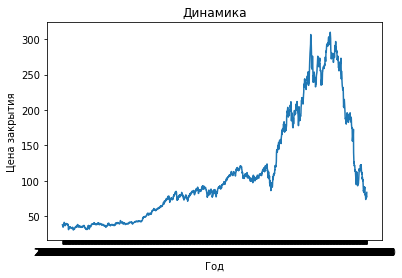

In [ ]:
#Цена сейчас пробила линию сопротивления и возможно пойдет вниз
plt.plot(dynamics_by_volume.index, dynamics_by_volume['Open'])
plt.title('Динамика')
plt.xlabel('Год')
plt.ylabel('Цена закрытия')

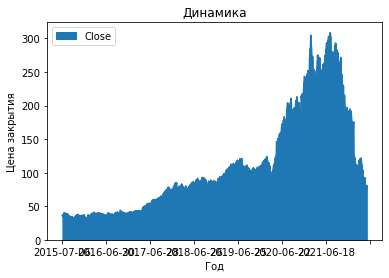

In [ ]:
#Самая высокая цена за акцию в районе 300$ - Точка сопротивления
dynamics_by_volume.drop('Open', axis=1).plot(kind='area',
                             title='Динамика', 
                             xlabel='Год', 
                             ylabel='Цена закрытия')

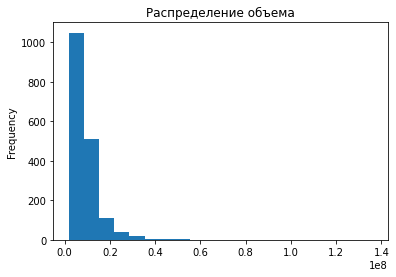

In [ ]:
#Cначала объем большой, далее к концу становиться мешьне
df['Volume'].plot(kind='hist', 
                   title='Распределение объема', bins=20)

Text(0.5, 1.0, 'Сравнение открытия и закрытия')

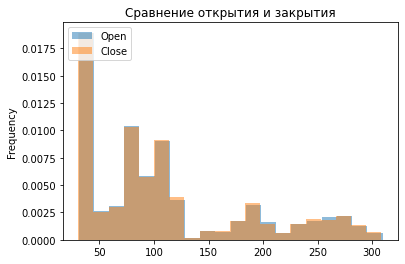

In [ ]:
#Волатильность между открытием и закрытием небольшая
df['Open'].plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     density = True)


df['Close'].plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     density = True)
plt.legend(loc='upper left')
plt.title('Сравнение открытия и закрытия')

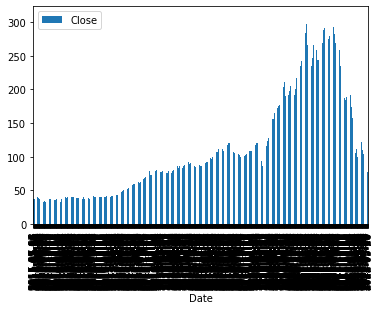

In [ ]:
# Акции Paypall на старте набирали оборот и увернно росли 

dynamics_by_volume.drop('Open', axis=1).plot(kind='bar', stacked=True)